## House Price Prediction

## Description

This project consists in creating different single predictive linear regression models in order to find a house sale price using:

**y = f(x) =  mx +b**

**Where:**
- y = dependent variable
- x = independent variable
- m = slope
- b = intercept

**"x"** and **"y"** will be part of the house dataset, and **"m"** and **"b"** will help us find the predicted value of the house. This means that **"m"** and **"b"** are the parameters of the model.

For the model to be able to predict house prices, these values and parameters are needed:
- y = Sale price of a house.
- x = A characteristic of some house.
- yhat = f(x) = estimated sale price of the house.
- m = slope needed to estimate sale price.
- b = intercept needed to estimate sale price.

## House prices dataset

This dataset contains the prices and characteristics of some houses.

**Description:**
- SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.

- OverallQual: Overall material and finish quality, rates the overall material and finish of the house
       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
          
- 1stFlrSF: First Floor square feet
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- YearBuilt: Original construction date
- LotFrontage: Linear feet of street connected to property

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
df = np.load(file = 'proyecto_training_data.npy')

## Train and test data

The dataset will be split into two:
- Train(will have 80% of the data)
- Test (will have 20% of the data)

The **Train** dataset will be used to find **"m"** and **"b"** for the model and the **Test** dataset will be used to compare **"yhat"** (predicted sale price) and **"y"** the actual sale price.

In [3]:
train = {
    "SalePrice": np.array(df[0:int(len(df)*0.80),0]),
    "OverallQual": np.array(df[0:int(len(df)*0.80),1])
}
test = {
    "SalePrice": np.array(df[int(len(df)*0.80):len(df),0]),
    "OverallQual": np.array(df[int(len(df)*0.80):len(df),1])
}

This model will only include the variable Overall Quality as it's the more correlated with Sale Price as we can see in this graph:

Text(0.5, 1.0, 'Overall Quality vs. Sale Price - Correlation of 0.794')

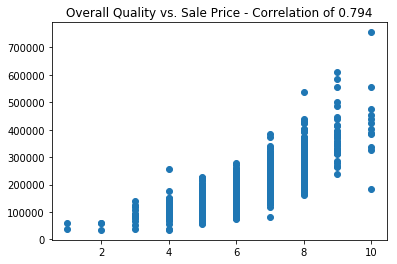

In [4]:
plt.scatter(x=train['OverallQual'], y=train['SalePrice'])
plt.title('Overall Quality vs. Sale Price - Correlation of ' + 
          str(np.round(np.corrcoef(x=train['OverallQual'], y=train['SalePrice'])[0,1],4)))

## Training model

In [5]:
x_train = train['OverallQual']
y_train = train['SalePrice']

In [5]:
def linear_model(epochs, lr, x, y, m, theta0, k):
    
    tf.reset_default_graph()
    
    #Model variables
    X = tf.placeholder("float")
    Y = tf.placeholder("float")
    n = len(y)
    k = k #parameter of the function
    
    #Learnable parameters
    m = tf.Variable(m, name = "m") 
    b = tf.Variable(theta0, name = "b")

    #Hyperparameters
    lr = lr #parameter of the function
    epochs = epochs #parameter of the function

    #Hypothesis
    y_hat = tf.add(tf.multiply(X, m), b)

    #Mean Squared Error - J(m,b)
    error = tf.reduce_sum(tf.square(y_hat-Y)) / (2 * n)

    #Optimizer algorithm (using GD to find min value of the error)
    optimizer = tf.train.GradientDescentOptimizer(lr).minimize(error)
    
    #Creating the scalar summary
    error_summary = tf.summary.scalar(name='ErrorSummary', tensor=error)
    
    with tf.Session() as sess:
        tf.initialize_all_variables().run()
        print('Variables successfully initialized')
        writer = tf.summary.FileWriter(('.graphs/graphs_'+str(lr)), sess.graph)
        for epoch in range(epochs):
            sess.run(optimizer, feed_dict={X : x, Y : y})
            if (epoch+1)%k==0:
                e_summary = sess.run(error_summary, feed_dict = {X : x, Y : y})
                e = sess.run(error, feed_dict = {X : x, Y : y})
                writer.add_summary(e_summary, epoch)
                print("Epoch", (epoch + 1), ": y_hat = ", sess.run(m), "x + ", sess.run(b), "; error = ", "{:,}".format(e), sep = "") 
        #SSE = sess.run(error, feed_dict ={X: x, Y: y})
        #slope = sess.run(m)
        #intercept = sess.run(b)
        writer.close()
    sess.close()

## Graph of the Model using Gradient Descent Optimizer
<img src="GraphTB.png">

## Model 1

* Epochs = 1000
* Learning Rate = 10
* SalePrice = m(OverallQual) + b

In [6]:
linear_model(epochs=1000, lr=10, x=train['OverallQual'], y=train['SalePrice'], m=1.0, theta0=5.0, k=5)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use `tf.global_variables_initializer` instead.
Variables successfully initialized
Epoch5: y_hat = 3.0231405e+17x + 4.720528e+16; error = inf
Epoch10: y_hat = -3.085081e+30x + -4.817239e+29; error = inf
Epoch15: y_hat = nanx + nan; error = nan
Epoch20: y_hat = nanx + nan; error = nan
Epoch25: y_hat = nanx + nan; error = nan
Epoch30: y_hat = nanx + nan; error = nan
Epoch35: y_hat = nanx + nan; error = nan
Epoch40: y_hat = nanx + nan; error = nan
Epoch45: y_hat = nanx + nan; error = nan
Epoch50: y_hat = nanx + nan; error = nan
Epoch55: y_hat = nanx + nan; error = nan
Epoch60: y_hat = nanx + nan; error = nan
Epoch65: y_hat = nanx + nan; error = nan
Epoch70: y_hat = nanx + nan; error = nan
Epoch75: y_hat = nanx + nan; error = nan
Epoch80: y_hat = nanx + nan; error = nan
Epoch85: y_hat = nanx + nan; error = nan
Epoch90: y_hat = nanx + nan; error =

### Results

#### Error trend for every epoch
<img src="Error10.png">

## Model 2

* Epochs = 1000
* Learning Rate = 1
* SalePrice = m(OverallQual) + b

In [14]:
linear_model(epochs=1000, lr=1, x=train['OverallQual'], y=train['SalePrice'], m=1.0, theta0=5.0, k=5)

Variables successfully initialized
Epoch5: y_hat = 2697799100000.0x + 421250900000.0; error = 1.4938178884913217e+26
Epoch10: y_hat = -2.4567789e+20x + -3.836175e+19; error = inf
Epoch15: y_hat = 2.2372979e+28x + 3.4934465e+27; error = inf
Epoch20: y_hat = -2.0374121e+36x + -3.1813415e+35; error = inf
Epoch25: y_hat = nanx + nan; error = nan
Epoch30: y_hat = nanx + nan; error = nan
Epoch35: y_hat = nanx + nan; error = nan
Epoch40: y_hat = nanx + nan; error = nan
Epoch45: y_hat = nanx + nan; error = nan
Epoch50: y_hat = nanx + nan; error = nan
Epoch55: y_hat = nanx + nan; error = nan
Epoch60: y_hat = nanx + nan; error = nan
Epoch65: y_hat = nanx + nan; error = nan
Epoch70: y_hat = nanx + nan; error = nan
Epoch75: y_hat = nanx + nan; error = nan
Epoch80: y_hat = nanx + nan; error = nan
Epoch85: y_hat = nanx + nan; error = nan
Epoch90: y_hat = nanx + nan; error = nan
Epoch95: y_hat = nanx + nan; error = nan
Epoch100: y_hat = nanx + nan; error = nan
Epoch105: y_hat = nanx + nan; error = na

### Results

#### Error trend for every epoch
<img src="Error1.png">

## Model 3

* Epochs = 1000
* Learning Rate = 0.1
* SalePrice = m(OverallQual) + b

In [8]:
linear_model(epochs=1000, lr=0.1, x=train['OverallQual'], y=train['SalePrice'], m=1.0, theta0=5.0, k=5)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use `tf.global_variables_initializer` instead.
Variables successfully initialized
Epoch5: y_hat = 7316190.5x + 1139972.0; error = 1,089,633,538,539,520.0
Epoch10: y_hat = -1792016900.0x + -279821440.0; error = 6.5913989254845825e+19
Epoch15: y_hat = 440755700000.0x + 68822340000.0; error = 3.9872522023172735e+24
Epoch20: y_hat = -108404710000000.0x + -16926996000000.0; error = 2.4119841933216225e+29
Epoch25: y_hat = 2.6662294e+16x + 4163225600000000.0; error = 1.4590615080725545e+34
Epoch30: y_hat = -6.557599e+18x + -1.0239436e+18; error = inf
Epoch35: y_hat = 1.6128468e+21x + 2.518402e+20; error = inf
Epoch40: y_hat = -3.9668192e+23x + -6.1940496e+22; error = inf
Epoch45: y_hat = 9.756384e+25x + 1.5234244e+25; error = inf
Epoch50: y_hat = -2.3995926e+28x + -3.7468785e+27; error = inf
Epoch55: y_hat = 5.9018157e+30x + 9.215456e+29; error = i

Epoch885: y_hat = nanx + nan; error = nan
Epoch890: y_hat = nanx + nan; error = nan
Epoch895: y_hat = nanx + nan; error = nan
Epoch900: y_hat = nanx + nan; error = nan
Epoch905: y_hat = nanx + nan; error = nan
Epoch910: y_hat = nanx + nan; error = nan
Epoch915: y_hat = nanx + nan; error = nan
Epoch920: y_hat = nanx + nan; error = nan
Epoch925: y_hat = nanx + nan; error = nan
Epoch930: y_hat = nanx + nan; error = nan
Epoch935: y_hat = nanx + nan; error = nan
Epoch940: y_hat = nanx + nan; error = nan
Epoch945: y_hat = nanx + nan; error = nan
Epoch950: y_hat = nanx + nan; error = nan
Epoch955: y_hat = nanx + nan; error = nan
Epoch960: y_hat = nanx + nan; error = nan
Epoch965: y_hat = nanx + nan; error = nan
Epoch970: y_hat = nanx + nan; error = nan
Epoch975: y_hat = nanx + nan; error = nan
Epoch980: y_hat = nanx + nan; error = nan
Epoch985: y_hat = nanx + nan; error = nan
Epoch990: y_hat = nanx + nan; error = nan
Epoch995: y_hat = nanx + nan; error = nan
Epoch1000: y_hat = nanx + nan; err

### Results

#### Error trend for every epoch
<img src="Error0.1.png">

## Model 4

* Epochs = 1000
* Learning Rate = 0.01
* SalePrice = m(OverallQual) + b

In [10]:
linear_model(epochs=1000, lr=0.01, x=train['OverallQual'], y=train['SalePrice'], m=1.0, theta0=5.0, k=5)

Variables successfully initialized
Epoch5: y_hat = 27373.176x + 4034.1184; error = 1,501,227,904.0
Epoch10: y_hat = 29523.17x + 4125.466; error = 1,393,097,216.0
Epoch15: y_hat = 29723.627x + 3912.9785; error = 1,391,298,304.0
Epoch20: y_hat = 29773.32x + 3677.5269; error = 1,390,139,776.0
Epoch25: y_hat = 29811.281x + 3440.8184; error = 1,388,990,592.0
Epoch30: y_hat = 29848.254x + 3204.529; error = 1,387,846,912.0
Epoch35: y_hat = 29885.07x + 2968.788; error = 1,386,708,736.0
Epoch40: y_hat = 29921.795x + 2733.6038; error = 1,385,575,808.0
Epoch45: y_hat = 29958.43x + 2498.9753; error = 1,384,448,384.0
Epoch50: y_hat = 29994.98x + 2264.902; error = 1,383,325,696.0
Epoch55: y_hat = 30031.443x + 2031.3822; error = 1,382,208,640.0
Epoch60: y_hat = 30067.818x + 1798.415; error = 1,381,096,960.0
Epoch65: y_hat = 30104.11x + 1565.9991; error = 1,379,990,912.0
Epoch70: y_hat = 30140.316x + 1334.1327; error = 1,378,889,472.0
Epoch75: y_hat = 30176.436x + 1102.8142; error = 1,377,793,792.0
Ep

Epoch635: y_hat = 33725.613x + -21627.023; error = 1,282,754,816.0
Epoch640: y_hat = 33753.254x + -21804.035; error = 1,282,113,408.0
Epoch645: y_hat = 33780.83x + -21980.629; error = 1,281,474,688.0
Epoch650: y_hat = 33808.34x + -22156.805; error = 1,280,838,912.0
Epoch655: y_hat = 33835.78x + -22332.564; error = 1,280,206,080.0
Epoch660: y_hat = 33863.16x + -22507.908; error = 1,279,576,320.0
Epoch665: y_hat = 33890.477x + -22682.838; error = 1,278,949,632.0
Epoch670: y_hat = 33917.727x + -22857.352; error = 1,278,326,144.0
Epoch675: y_hat = 33944.914x + -23031.455; error = 1,277,704,960.0
Epoch680: y_hat = 33972.03x + -23205.145; error = 1,277,087,488.0
Epoch685: y_hat = 33999.09x + -23378.424; error = 1,276,472,064.0
Epoch690: y_hat = 34026.082x + -23551.295; error = 1,275,859,712.0
Epoch695: y_hat = 34053.01x + -23723.756; error = 1,275,250,816.0
Epoch700: y_hat = 34079.875x + -23895.809; error = 1,274,644,480.0
Epoch705: y_hat = 34106.68x + -24067.455; error = 1,274,041,216.0
Epo

### Results

#### Error trend for every epoch
<img src="Error0.01.png">

## Model 5

* Epochs = 1000
* Learning Rate = 0.001
* SalePrice = m(OverallQual) + b

In [12]:
linear_model(epochs=1000, lr=0.001, x=train['OverallQual'], y=train['SalePrice'], m=1.0, theta0=5.0, k=5)

Variables successfully initialized
Epoch5: y_hat = 5483.3613x + 836.53485; error = 13,361,158,144.0
Epoch10: y_hat = 9952.53x + 1509.8695; error = 9,344,257,024.0
Epoch15: y_hat = 13595.883x + 2054.2617; error = 6,675,669,504.0
Epoch20: y_hat = 16566.143x + 2493.5583; error = 4,902,803,968.0
Epoch25: y_hat = 18987.785x + 2847.1965; error = 3,724,996,352.0
Epoch30: y_hat = 20962.271x + 3131.0188; error = 2,942,503,680.0
Epoch35: y_hat = 22572.295x + 3357.937; error = 2,422,630,912.0
Epoch40: y_hat = 23885.256x + 3538.4763; error = 2,077,224,960.0
Epoch45: y_hat = 24956.092x + 3681.2144; error = 1,847,721,600.0
Epoch50: y_hat = 25829.584x + 3793.1438; error = 1,695,216,384.0
Epoch55: y_hat = 26542.225x + 3879.9626; error = 1,593,862,656.0
Epoch60: y_hat = 27123.762x + 3946.3157; error = 1,526,491,392.0
Epoch65: y_hat = 27598.44x + 3995.9893; error = 1,481,695,616.0
Epoch70: y_hat = 27986.021x + 4032.0686; error = 1,451,897,344.0
Epoch75: y_hat = 28302.617x + 4057.069; error = 1,432,062,3

Epoch895: y_hat = 30280.549x + 435.98007; error = 1,374,648,960.0
Epoch900: y_hat = 30284.133x + 413.04138; error = 1,374,541,056.0
Epoch905: y_hat = 30287.717x + 390.10803; error = 1,374,433,280.0
Epoch910: y_hat = 30291.3x + 367.18002; error = 1,374,325,248.0
Epoch915: y_hat = 30294.88x + 344.25735; error = 1,374,217,472.0
Epoch920: y_hat = 30298.455x + 321.34024; error = 1,374,110,720.0
Epoch925: y_hat = 30302.03x + 298.42862; error = 1,374,002,176.0
Epoch930: y_hat = 30305.604x + 275.52252; error = 1,373,894,784.0
Epoch935: y_hat = 30309.178x + 252.62189; error = 1,373,787,648.0
Epoch940: y_hat = 30312.752x + 229.7267; error = 1,373,680,384.0
Epoch945: y_hat = 30316.326x + 206.83698; error = 1,373,572,608.0
Epoch950: y_hat = 30319.9x + 183.95262; error = 1,373,465,728.0
Epoch955: y_hat = 30323.475x + 161.07368; error = 1,373,358,464.0
Epoch960: y_hat = 30327.049x + 138.2001; error = 1,373,251,456.0
Epoch965: y_hat = 30330.623x + 115.331825; error = 1,373,144,064.0
Epoch970: y_hat =

### Results

#### Error trend for every epoch
<img src="Error0.001.png">

## Model 6

* Epochs = 1000
* Learning Rate = 0.0001
* SalePrice = m(OverallQual) + b

In [21]:
linear_model(epochs=1000, lr=0.0001, x=train['OverallQual'], y=train['SalePrice'], m=1.0, theta0=5.0, k=5)

Variables successfully initialized
Epoch5: y_hat = 590.2009x + 94.549774; error = 18,698,676,224.0
Epoch10: y_hat = 1167.6981x + 182.2721; error = 18,017,624,064.0
Epoch15: y_hat = 1733.7244x + 268.2033; error = 17,363,380,224.0
Epoch20: y_hat = 2288.5073x + 352.37903; error = 16,734,877,696.0
Epoch25: y_hat = 2832.2708x + 434.83414; error = 16,131,115,008.0
Epoch30: y_hat = 3365.2336x + 515.60284; error = 15,551,114,240.0
Epoch35: y_hat = 3887.6106x + 594.7186; error = 14,993,947,648.0
Epoch40: y_hat = 4399.612x + 672.21436; error = 14,458,704,896.0
Epoch45: y_hat = 4901.4434x + 748.1223; error = 13,944,523,776.0
Epoch50: y_hat = 5393.3086x + 822.47394; error = 13,450,579,968.0
Epoch55: y_hat = 5875.4043x + 895.30023; error = 12,976,079,872.0
Epoch60: y_hat = 6347.926x + 966.6315; error = 12,520,248,320.0
Epoch65: y_hat = 6811.0625x + 1036.4974; error = 12,082,358,272.0
Epoch70: y_hat = 7265.001x + 1104.9272; error = 11,661,704,192.0
Epoch75: y_hat = 7709.9243x + 1171.9495; error = 11

Epoch655: y_hat = 27539.191x + 3984.3008; error = 1,486,837,248.0
Epoch660: y_hat = 27582.006x + 3988.5417; error = 1,483,142,144.0
Epoch665: y_hat = 27623.979x + 3992.6511; error = 1,479,592,576.0
Epoch670: y_hat = 27665.123x + 3996.6318; error = 1,476,181,504.0
Epoch675: y_hat = 27705.455x + 4000.4856; error = 1,472,905,216.0
Epoch680: y_hat = 27744.996x + 4004.2153; error = 1,469,756,672.0
Epoch685: y_hat = 27783.756x + 4007.8237; error = 1,466,732,032.0
Epoch690: y_hat = 27821.752x + 4011.313; error = 1,463,826,176.0
Epoch695: y_hat = 27859.0x + 4014.6858; error = 1,461,033,344.0
Epoch700: y_hat = 27895.516x + 4017.9438; error = 1,458,350,848.0
Epoch705: y_hat = 27931.314x + 4021.0898; error = 1,455,772,800.0
Epoch710: y_hat = 27966.408x + 4024.126; error = 1,453,296,384.0
Epoch715: y_hat = 28000.812x + 4027.0542; error = 1,450,916,480.0
Epoch720: y_hat = 28034.54x + 4029.877; error = 1,448,630,400.0
Epoch725: y_hat = 28067.604x + 4032.5962; error = 1,446,433,408.0
Epoch730: y_hat 

### Results

#### Error trend for every epoch
<img src="Error0.0001.png">

## Conclusion

We can see that the error with the **Linear Rate: 0.01** has the lowest error from the 6 models. This appears to be the best model because it reaches the minimum value of the error between y and y_hat. It's very surprising that if we decrease the LR to a lower value, the error becomes higher.

In general, I was expecting a lower error as the LR is decreasing because, even though the steps get smaller, it's a more "accurate" model. But with these results, we can conclude that this isn't true and that the LR that minimizes the error for this data is **0.01**.